In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

df_red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_white.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
from sklearn.utils import resample
df_red_oversample = resample(df_red, n_samples=len(df_white), random_state=42, replace=True).reset_index(drop=True)
df_red_oversample.shape

(4898, 12)

In [8]:
df_white['color'] = 1
df_red_oversample['color'] = 0
df_wine = pd.concat([df_white, df_red_oversample], ignore_index=True)
df_wine.shape

(9796, 13)

In [10]:
df_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [11]:
Y = df_wine['color']
X = df_wine.drop(columns=['color'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(7836, 12) (1960, 12) (7836,) (1960,)


In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.831514,-1.121819,-0.070598,0.254392,-0.596153,1.074956,1.618411,-0.830553,-0.376300,-0.628993,-0.156929,0.281660
1,-1.284562,-0.833212,-0.312861,1.261773,-0.836148,-0.787195,-0.401492,-0.492290,0.358407,-1.390875,0.017255,-0.873882
2,-0.831514,-0.859449,1.504112,0.878008,-0.644152,2.413377,2.069133,0.198331,-0.070172,-0.453174,-1.114940,-0.873882
3,-1.090399,-0.282235,1.019586,-0.537122,1.035813,-0.670811,0.767047,-0.774176,-0.988556,-0.453174,-1.202031,-0.873882
4,-1.543447,-1.305478,0.171665,-0.681033,-0.932146,-0.729003,-0.551733,-1.989809,0.297182,1.539441,1.236541,2.592744


In [33]:
model = Sequential(
    [
        Dense(8, input_shape=(12,), activation='tanh'),
        Dense(1, activation='sigmoid')
    ]
)
model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

/Users/tungdt/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model_logs = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.8100 - loss: 0.1707
Epoch 2/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.9504 - loss: 0.0779
Epoch 3/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.9660 - loss: 0.0500
Epoch 4/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.9739 - loss: 0.0386
Epoch 5/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.9789 - loss: 0.0325
Epoch 6/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.9819 - loss: 0.0269
Epoch 7/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.9809 - loss: 0.0267
Epoch 8/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.9825 - loss: 0.0230
Epoch 9/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.9843 - loss: 0.0216
Epoch 10/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.9865 - loss: 0.0193
Epoch 11/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.9852 - loss: 0.0191
Epoch 12/50
245/245 ━━━━━━━━━━

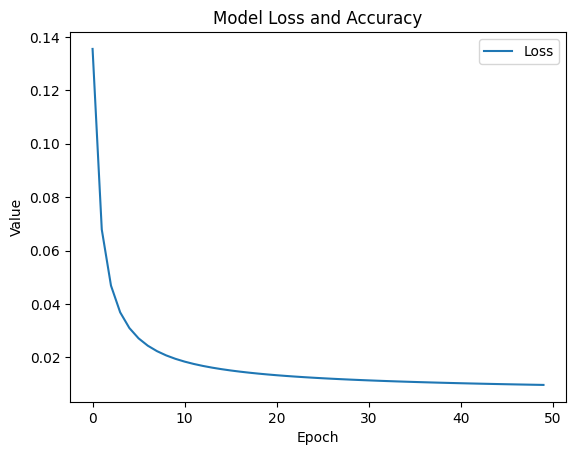

In [35]:
plt.plot(model_logs.history['loss'])
plt.title('Model Loss and Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Loss'], loc='upper right')
plt.show()

In [36]:
Y_pred = model.predict(X_test)
print(np.round(Y_pred[:5]).reshape(-1))
print(Y_test.values[:5])

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
[1. 1. 0. 0. 1.]
[1 1 0 0 1]


In [37]:
print(accuracy_score(Y_test, np.round(Y_pred).reshape(-1)))

0.9913265306122448
